# Code feature extraction
*Limited to Python*

In [32]:
import sqlite3

import numpy as np
import pandas as pd
from typing import *
import ast

import torch
from bs4 import BeautifulSoup
from post_embedding_builder import PostEmbedding

In [33]:
# Create your connection.
db = sqlite3.connect('../stackoverflow.db')

Now for just 1 user

In [34]:
user_id = 13009

In [35]:
questions = pd.read_sql_query(f"""
        SELECT *
        FROM Post
        WHERE Tags LIKE '%python%' AND (PostTypeId = 1) AND ((LastEditorUserId = {user_id}) OR (OwnerUserId = {user_id}))
""", db)
questions.set_index('PostId', inplace=True)
questions

,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditorDisplayName,LastEditDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,CommunityOwnedDate,ContentLicense,ParentId
PostId,,,,,,,,,,,,,,,,,,
269676,1,NaN,2008-11-06T18:06:13.213,10,7250,<p>I want to make my Python library working wi...,13009,13009.0,Greg,2008-11-10T15:12:18.133,How can I Cause a Deadlock in MySQL for Testin...,<python><mysql><database><deadlock>,5,0,3.0,None,CC BY-SA 2.5,None
1046474,1,1046522.0,2009-06-25T22:04:16.890,5,12418,<p>How do I run this command with subprocess?<...,13009,13009.0,None,2009-06-25T22:21:41.520,Python - Subprocess - How to call a Piped comm...,<python><subprocess><pipe><echo><popen>,2,2,3.0,None,CC BY-SA 2.5,None
2970045,1,2974177.0,2010-06-03T21:52:14.793,6,7850,<p>I have a python web application that needs ...,13009,13009.0,None,2010-06-03T22:11:27.260,Python - Launch a Long Running Process from a ...,<python><windows><winapi><popen><long-running-...,4,2,6.0,None,CC BY-SA 2.5,None
3712445,1,3712645.0,2010-09-14T20:04:19.940,1,405,<p>Say I have text 'C:\somedir\test.log' and I...,13009,13009.0,None,2010-09-14T20:18:32.083,Python Regular Expression Question,<python><regex>,4,0,1.0,None,CC BY-SA 2.5,None
5538814,1,5539724.0,2011-04-04T13:00:53.620,0,631,"<p>I have multiple Django apps, and I have som...",13009,13009.0,None,2011-04-04T13:15:37.903,Django - non app specific models.py?,<python><django><django-models>,3,0,1.0,None,CC BY-SA 2.5,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36922532,1,36922586.0,2016-04-28T18:18:49.007,6,3284,<p>I know there must be a way to do this. But...,13009,NaN,None,None,Python functools.partial - How to apply it to ...,<python><static-methods><python-decorators><fu...,3,0,1.0,None,CC BY-SA 3.0,None
40749339,1,40749648.0,2016-11-22T18:42:04.867,1,1271,<p>Say I have a script like this:</p>\n\n<pre>...,13009,NaN,None,None,Python subprocess - check exit codes of forked...,<python><subprocess><fork>,1,0,NaN,None,CC BY-SA 3.0,None
41616578,1,41623932.0,2017-01-12T15:10:45.340,2,24094,<p>I'm trying to run code like this:</p>\n\n<p...,13009,NaN,None,None,Psycopg copy_expert method - How to use properly,<python><postgresql><psycopg2><psycopg>,2,2,NaN,None,CC BY-SA 3.0,None


In [36]:
answers = pd.read_sql_query(f"""
        SELECT A.Tags, B.*
        FROM Post A
            INNER JOIN Post B ON (B.ParentId = A.PostId) AND (B.ParentId IS NOT NULL)
        WHERE A.Tags LIKE '%python%' AND (B.PostTypeId = 2) AND ((B.LastEditorUserId = {user_id}) OR (B.OwnerUserId = {user_id}))
""", db)
answers = answers.loc[:,~answers.columns.duplicated()].copy()
answers.set_index('PostId', inplace=True)
answers

,Tags,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditorDisplayName,LastEditDate,Title,AnswerCount,CommentCount,FavoriteCount,CommunityOwnedDate,ContentLicense,ParentId
PostId,,,,,,,,,,,,,,,,,,
6930808,<python><django><django-models><django-admin><...,2,None,2011-08-03T17:45:24.243,1,None,"<p>Well, here's a work around since I can't fi...",13009,13009.0,None,2011-08-04T11:44:00.257,None,None,0,None,None,CC BY-SA 3.0,6913166
45239952,<python><django><migration><django-migrations>,2,None,2017-07-21T14:15:08.280,6,None,<p>Looks like I just needed to get User the sa...,13009,13009.0,None,2017-07-21T19:13:22.417,None,None,0,None,None,CC BY-SA 3.0,45238835
74335,<python><amazon>,2,None,2008-09-16T16:40:08.743,2,None,<p>pyaws seems to be the best one out there. ...,13009,NaN,None,None,None,None,0,None,None,CC BY-SA 2.5,48884
94627,<python><user-interface><api>,2,None,2008-09-18T17:21:42.810,3,None,"<p><a href=""http://pythoncard.sourceforge.net/...",13009,216356.0,None,2012-08-09T19:47:56.843,None,None,1,None,None,CC BY-SA 3.0,93930
109724,<python><excel><xlwt><pyexcelerator>,2,None,2008-09-20T23:10:13.863,2,None,"<p>Found example here: <a href=""http://www.ans...",13009,NaN,None,None,None,None,1,None,None,CC BY-SA 2.5,108134
207065,<python><ajax><screen-scraping><beautifulsoup>,2,None,2008-10-16T00:58:10.813,0,None,<p>This seems like it's a pretty common proble...,13009,NaN,None,None,None,None,1,None,None,CC BY-SA 2.5,206855
207074,<python><soap><soap-client>,2,None,2008-10-16T01:00:24.800,1,None,"<p>As I suggested <a href=""https://stackoverfl...",13009,-1.0,None,2017-05-23T12:34:59.060,None,None,0,None,None,CC BY-SA 2.5,206154
224014,<python><ruby><perl><text-parsing>,2,None,2008-10-22T00:03:23.323,5,None,"<p><a href=""http://pyparsing.wikispaces.com/"" ...",13009,NaN,None,None,None,None,0,None,None,CC BY-SA 2.5,223866
273994,<python><programming-languages><python-3.x>,2,None,2008-11-07T23:29:44.590,4,None,<p>Wouldn't VB6 to VB.net be the biggest examp...,13009,NaN,None,None,None,None,3,None,None,CC BY-SA 2.5,273524


In [37]:
questions_and_answers = pd.concat([questions, answers], ignore_index=True)

In [38]:
comments_on_questions = pd.read_sql_query(f"""
        SELECT A.Tags, B.*
        FROM Post A
            INNER JOIN Comment B ON (B.PostId = A.PostId)
        WHERE A.Tags LIKE '%python%' AND (B.UserId = {user_id}) AND (A.PostTypeId = 1)
""", db)
comments_on_questions.set_index('CommentId', inplace=True)
comments_on_questions

,Tags,PostId,Score,Body,CreationDate,UserId,ContentLicense
CommentId,,,,,,,
857928,<python><subprocess><pipe><echo><popen>,1046474,0,"Yes, it runs from the windows dos console.",2009-06-25T22:15:13.437,13009,CC BY-SA 2.5
1513319,<python><django><forms><django-forms>,1640204,0,"lemonad, this would be at form creation time, ...",2009-10-29T12:44:20.160,13009,CC BY-SA 2.5
3029786,<python><windows><winapi><popen><long-running-...,2970045,0,Here are a few windows API commands that look ...,2010-06-03T22:10:42.643,13009,CC BY-SA 2.5
3421734,<python><permissions><authorization><decorator...,3302844,0,I don't think I want to use anything built-in....,2010-07-21T19:14:03.313,13009,CC BY-SA 2.5
6330991,<python><django><django-models><decimal><scien...,5566121,0,"4.08E+13 has two decimal places, I'm allowing ...",2011-04-06T12:26:33.123,13009,CC BY-SA 2.5
6331285,<python><django><django-models><decimal><scien...,5566121,0,I followed those instructions. I've tried all...,2011-04-06T12:43:15.377,13009,CC BY-SA 2.5
6774887,<python><database><migration><django-south>,5833418,4,"It's going to be pretty critical data, and hon...",2011-05-04T20:00:35.997,13009,CC BY-SA 3.0
8234046,<python><django><django-models><django-admin><...,6913166,1,I'm thinking I need to make a custom model fie...,2011-08-02T14:23:53.283,13009,CC BY-SA 3.0
8234115,<python><string-formatting><number-formatting>...,6913532,32,"nah, not at all. I wanted to separate this int...",2011-08-02T14:26:37.263,13009,CC BY-SA 3.0


In [39]:
comments_on_answers = pd.read_sql_query(f"""
    SELECT A.Tags, C.*
    FROM Post A
        INNER JOIN Post B ON (B.ParentId = A.PostId) AND (B.ParentId IS NOT NULL)
        INNER JOIN Comment C ON (B.PostId = C.PostId)
    WHERE A.Tags LIKE '%python%' AND (C.UserId = {user_id}) AND (B.PostTypeId = 2)
""", db)
comments_on_answers.set_index('CommentId', inplace=True)
comments_on_answers

,Tags,PostId,Score,Body,CreationDate,UserId,ContentLicense
CommentId,,,,,,,
27452,<python><memory-management><short>,120454,0,Can I use IIBTree without installing all of Zo...,2008-09-23T16:48:24.133,13009,CC BY-SA 2.5
30223,<python>,125052,0,Keep in mind there are some unpythonic idioms ...,2008-09-24T14:02:17.330,13009,CC BY-SA 2.5
63505,<python>,92318,0,What about iterators exactly?,2008-10-08T01:43:15.823,13009,CC BY-SA 2.5
124749,<python><mysql><database><deadlock>,270449,0,That would just cause a OperationalError: (120...,2008-11-06T22:10:52.610,13009,CC BY-SA 2.5
124761,<python><mysql><database><deadlock>,270492,0,How would I make sure they run at exactly the ...,2008-11-06T22:12:43.137,13009,CC BY-SA 2.5
...,...,...,...,...,...,...,...
68725297,<python><subprocess><fork>,40749648,0,Follow up question. What if the child finishe...,2016-11-22T19:04:27.827,13009,CC BY-SA 3.0
68725576,<python><subprocess><fork>,40749648,1,"Excellent thanks! From your article, I guess ...",2016-11-22T19:13:12.043,13009,CC BY-SA 3.0
70480473,<python><postgresql><psycopg2><psycopg>,41623932,0,"Yes, I verified that worked to remove the quot...",2017-01-13T17:35:23.640,13009,CC BY-SA 3.0


In [40]:
all_comments = pd.concat([comments_on_questions, comments_on_answers])

**Visualisation demo**

In [41]:
from graph4nlp.pytorch.data.data import GraphData
import networkx as nx

In [42]:
from matplotlib import pyplot as plt


def display_graph(g: GraphData, color_map=None) -> None:
    plt.figure(figsize=(40,40))
    dgl_ug = g.to_dgl()
    nx_ug_graph = dgl_ug.to_networkx()
    pos_ug = nx.spring_layout(nx_ug_graph)#, k=0.15, iterations=20)
    if color_map is not None:
        nx.draw(nx_ug_graph, pos_ug, with_labels=True, node_color=color_map)
    else:
        nx.draw(nx_ug_graph, pos_ug, with_labels=True, node_color=[[.7, .7, .7]])


## Building the user-level graph

In [43]:
user_graph = GraphData()
next_node = 0
color_map = []

In [44]:
def next(feature, color):
    node_features.append(feature)
    color_map.append(color)
    global next_node
    next_node += 1

In [45]:
node_features = []
tag_dict = {} # tag name: node id
module_dict = {}

In [46]:
edges_src = []
edges_dest = []

In [47]:
post_embedding_builder = PostEmbedding()

In [48]:
from post_embedding_builder import Import

FIRST_N_TAGS = 3
def parse_tag_list(tag_list: str) -> List[str]:
    return tag_list[1:-1].split("><")

def process_module_names(import_statements: List[Import], src_node: int):
    for i in import_statements:
        if not i.module:
            continue
        module_name = i.module[0]
        print(module_name)
        if module_name not in module_dict:
            module_dict[module_name] = next_node
            next(torch.rand(300), 'orange')
        edges_src.append(src_node)
        edges_dest.append(module_dict[module_name])

In [49]:
for i, body, title, tags in questions[['Body', 'Title', 'Tags']].itertuples():
    post_node_id = next_node
    word_embedding, code_features = post_embedding_builder(body, title)
    next(word_embedding, 'blue')

    process_module_names(code_features[0], post_node_id)
    # Find outgoing tags
    tag_list = parse_tag_list(tags)[:FIRST_N_TAGS]
    for t in tag_list:
        if t in ['python']:
            continue
        if t not in tag_dict:
            tag_dict[t] = next_node
            next(torch.rand(300), 'red')

        edges_src.append(post_node_id)
        edges_dest.append(tag_dict[t])

django
django
__future__
django
django


In [50]:
for i, body, title, tags in answers[['Body', 'Title', 'Tags']].itertuples():
    post_node_id = next_node
    word_embedding, code_features = post_embedding_builder(body, title)
    next(word_embedding, 'green')

    process_module_names(code_features[0], post_node_id)
    # Find outgoing tags
    tag_list = parse_tag_list(tags)[:FIRST_N_TAGS]
    for t in tag_list:
        if t in ['python']:
            continue
        if t not in tag_dict:
            tag_dict[t] = next_node
            next(torch.rand(300), 'red')

        edges_src.append(post_node_id)
        edges_dest.append(tag_dict[t])

__future__
django
xlutils
xlrd
flask


## Now the comments

In [51]:
for i, body, tags in all_comments[['Body', 'Tags']].itertuples():
    comment_node_id = next_node
    word_embedding, code_features = post_embedding_builder(body)
    next(word_embedding, 'yellow')

    # Find outgoing tags
    tag_list = parse_tag_list(tags)[:FIRST_N_TAGS]
    for t in tag_list:
        if t in ['python']:
            continue
        if t not in tag_dict:
            tag_dict[t] = next_node
            next(torch.rand(300), 'red')

        edges_src.append(comment_node_id)
        edges_dest.append(tag_dict[t])

C:\Users\liamb\Documents\graph4stackoverflow\venv\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


. . . ALL TOGETHER NOW

In [52]:
user_graph.add_nodes(next_node)
user_graph.add_edges(edges_src, edges_dest)

C:\Users\liamb\Documents\graph4stackoverflow\venv\lib\site-packages\graph4nlp\pytorch\data\data.py:422: Warning: Edge (85, 86) is already in the graph. Skipping this edge.
  warnings.warn(
C:\Users\liamb\Documents\graph4stackoverflow\venv\lib\site-packages\graph4nlp\pytorch\data\data.py:422: Warning: Edge (209, 86) is already in the graph. Skipping this edge.
  warnings.warn(


In [53]:
print(f"""
Number of tag nodes: {len(tag_dict)}
Number of question nodes: {len(questions)}
Number of answer nodes: {len(answers)}
Number of edges: {len(edges_src), len(edges_dest)}
---------------------------------
User Graph:
Nodes: {user_graph.get_node_num()}
Edges: {user_graph.get_edge_num()}
""")


Number of tag nodes: 136
Number of question nodes: 105
Number of answer nodes: 49
Number of edges: (534, 534)
---------------------------------
User Graph:
Nodes: 439
Edges: 534



In [54]:
assert len(node_features) == user_graph.get_node_num()
assert len(color_map) == user_graph.get_node_num()

In [55]:
user_graph.node_features['node_feat'] = torch.stack(node_features)

In [56]:
tag_dict

{'mysql': 1,
 'database': 2,
 'subprocess': 4,
 'pipe': 5,
 'windows': 7,
 'winapi': 8,
 'regex': 10,
 'django': 12,
 'django-models': 13,
 'django-email': 16,
 'django-forms': 20,
 'unicode': 22,
 'jdbc': 24,
 'jpype': 25,
 'python-2.7': 27,
 'matplotlib': 29,
 'celery': 31,
 'mocking': 34,
 'generator': 35,
 'logging': 37,
 'packaging': 40,
 'py2exe': 41,
 'file': 43,
 'html': 45,
 'forms': 48,
 'python-3.x': 50,
 'ascii': 53,
 'class': 55,
 'getattr': 56,
 'vcf-vcard': 58,
 'image-processing': 60,
 'python-imaging-library': 61,
 'image': 63,
 'user-interface': 66,
 'mouse': 67,
 'events': 69,
 'event-handling': 70,
 'wxpython': 72,
 'encryption': 74,
 'public-key-encryption': 75,
 'c': 77,
 'installation': 78,
 'serial-port': 80,
 'arduino': 81,
 'newline': 83,
 'word-wrap': 84,
 'datetime': 88,
 'unit-testing': 91,
 'pdf': 93,
 'printing': 94,
 'sql-server': 96,
 'pyodbc': 97,
 'vba': 100,
 'ms-word': 101,
 'apache': 103,
 'permissions': 105,
 'authorization': 106,
 'sqlalchemy': 1

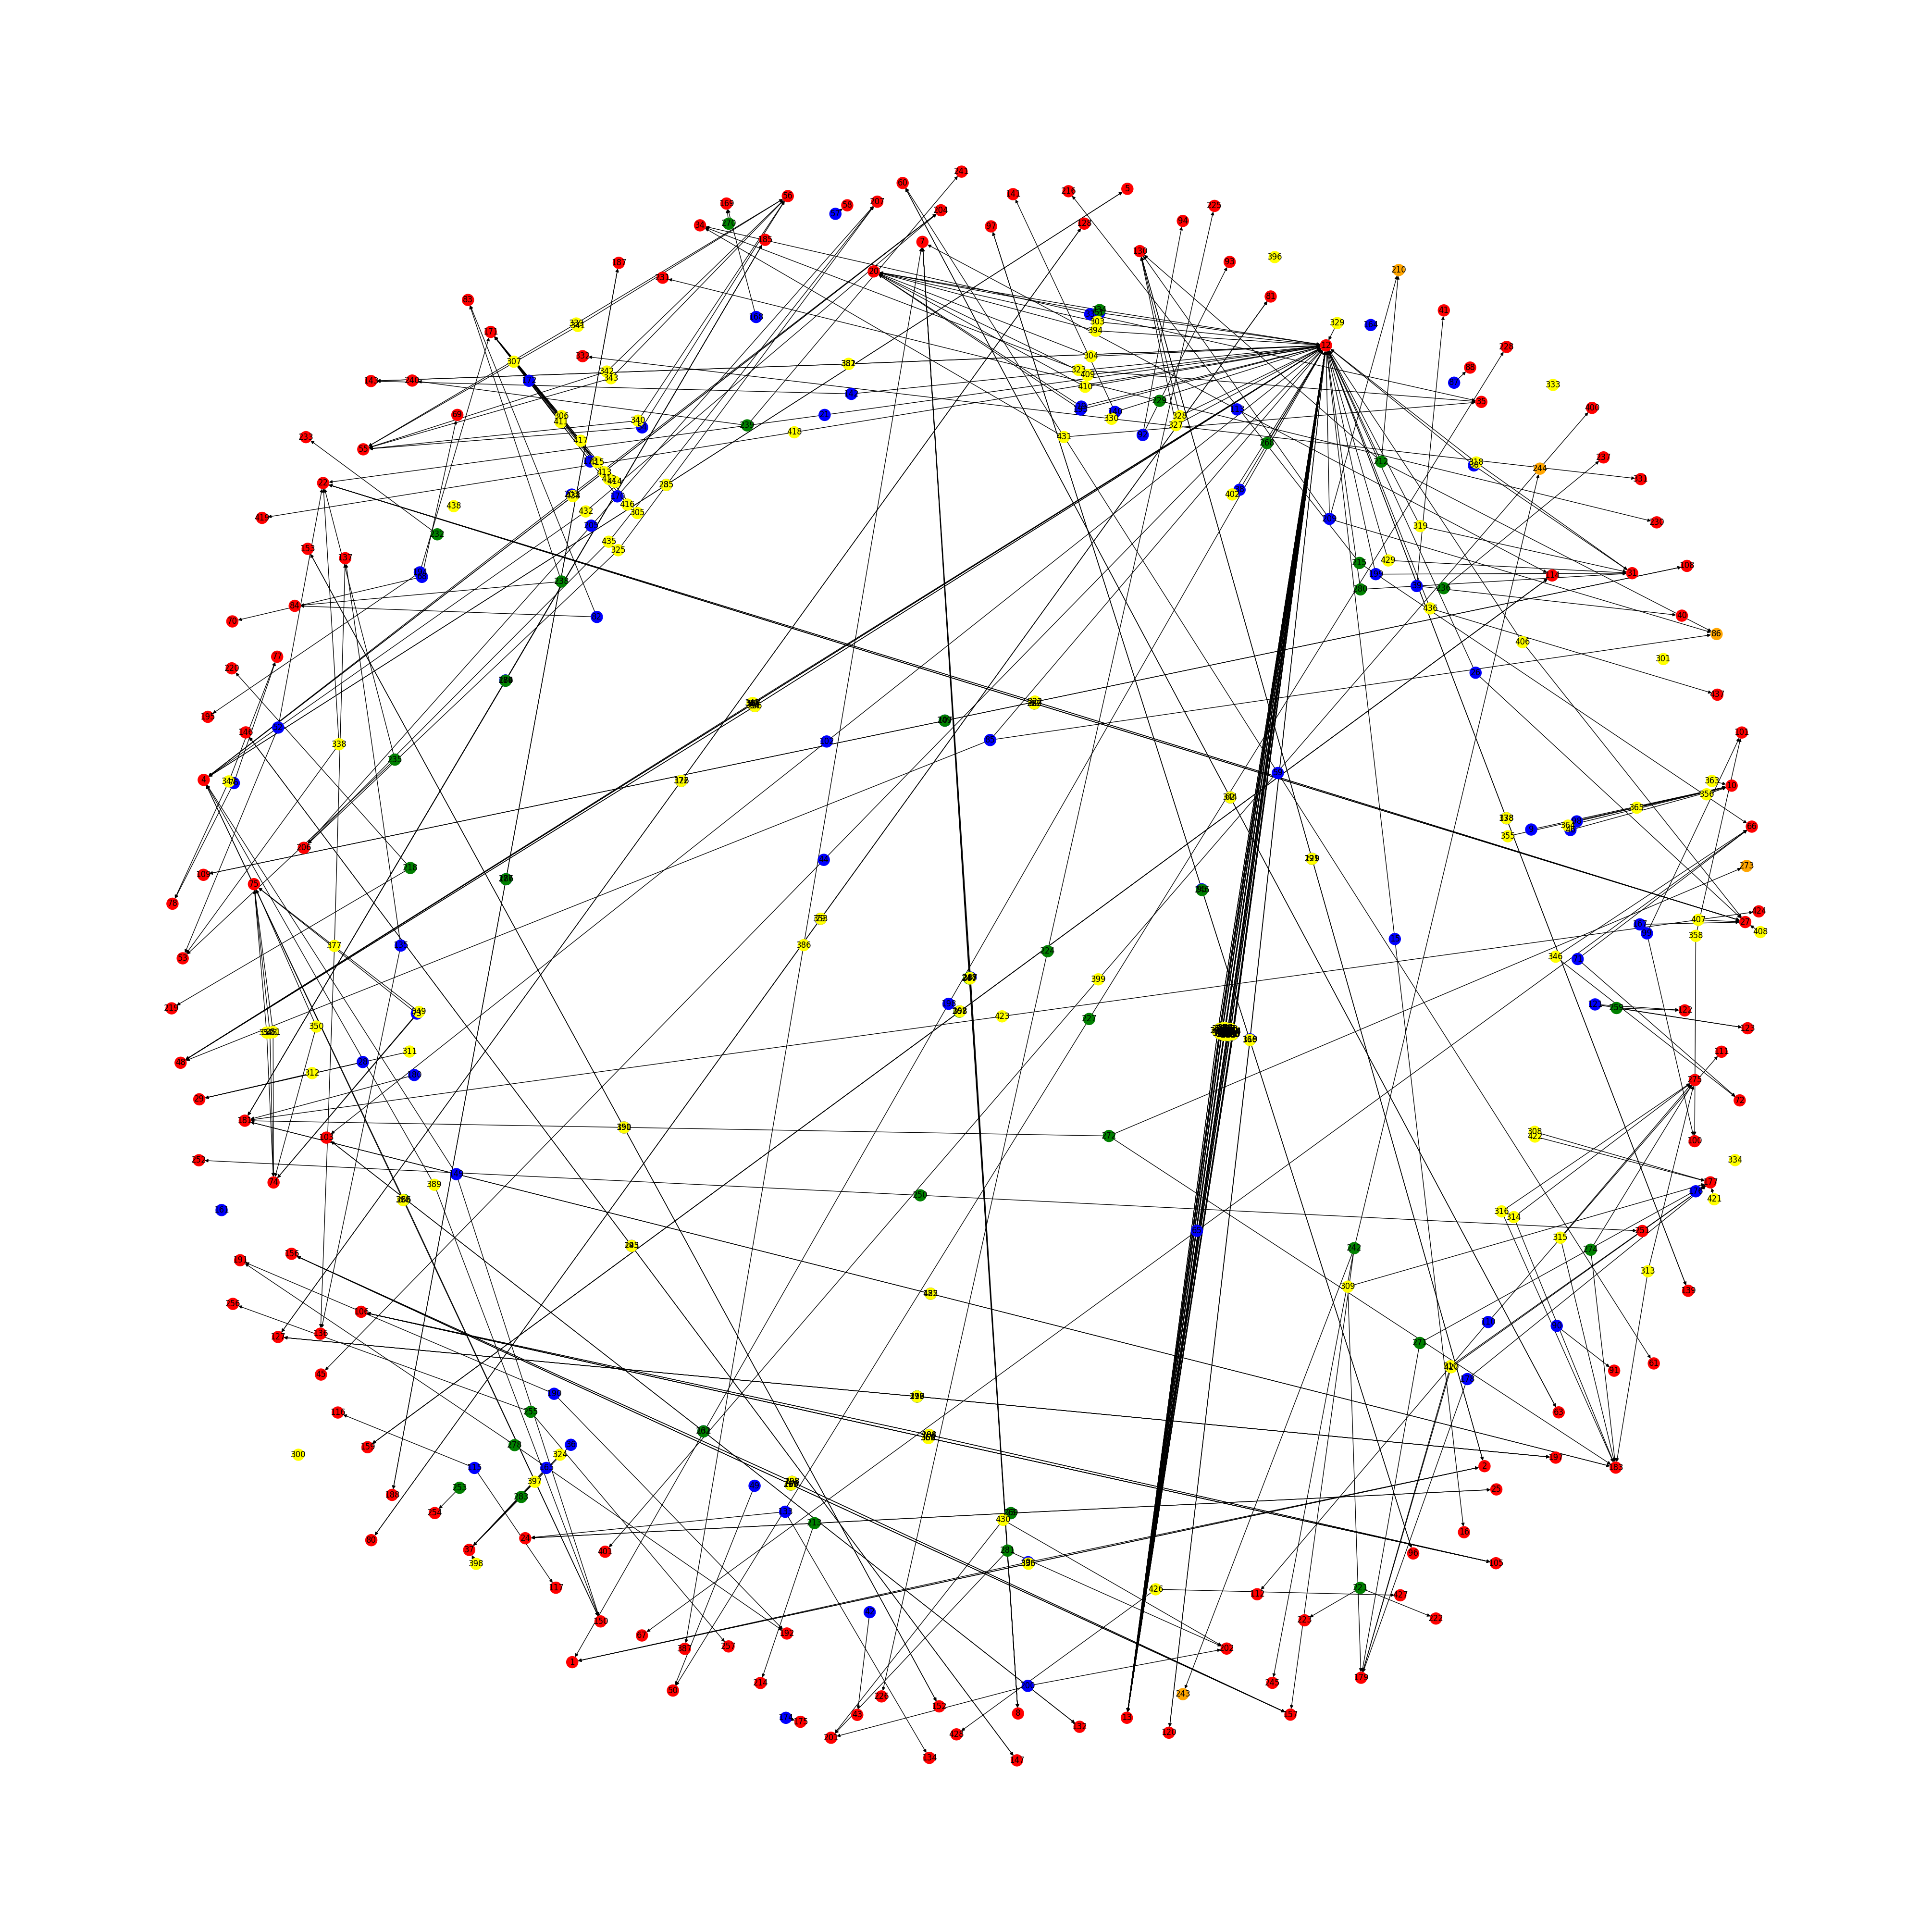

In [57]:
display_graph(user_graph, color_map=color_map)
plt.savefig("user-graph.svg", format="SVG")

In [58]:
[x for x in edges_src if x in tag_dict.values()]

[]